##### Bank Telemarketing Campaign Case Study.

#### Problem Statement:
The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.



In [ ]:
#import libraries and warings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Segment- 2, Data Types
There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.

In [ ]:
df =  pd.read_csv("/content/bank_marketing_updated_v1.csv", skiprows = 2)

In [ ]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns
Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately.
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.

In [ ]:
#droping customer id
df.drop('customerid', axis = 1 , inplace = True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [ ]:
#split jobedu into 2 column
df['job'] =  df['jobedu'].str.split(',').str.get(0)
df['education'] =  df['jobedu'].str.split(',').str.get(1)

In [ ]:
#droping jobedu column
df.drop('jobedu', axis =1, inplace = True)

In [ ]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
#checking the missing value
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [ ]:
df.shape

(45211, 19)

In [ ]:
#checking the missing value in age colum
df.age.isnull().sum()

20

In [ ]:
#checking the percentage
100*19/45211


0.042025170865497334

In [ ]:
#droping missing vlaue
df = df.dropna(subset = 'age')

In [ ]:
#handling missing value of month
df['month'].isnull().sum()

50

In [ ]:
df['month'].value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [ ]:
#filling value with mode
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [ ]:
month_moode = df['month'].mode()[0]
month_mode

NameError: ignored

In [ ]:
df['month'].fillna('may, 2017', inplace =  True)

In [ ]:
df['month'].isnull().sum()

50

In [ ]:
#checking the pdays
df['pdays'].value_counts()

-1      36939
 182      167
 92       146
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 558, dtype: int64

In [ ]:
df['pdays'].describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [ ]:
df.loc[df.pdays<0,'pdays'] = np.NaN

In [ ]:
df['pdays'].describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#outlier handling

In [ ]:
df['age'].describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

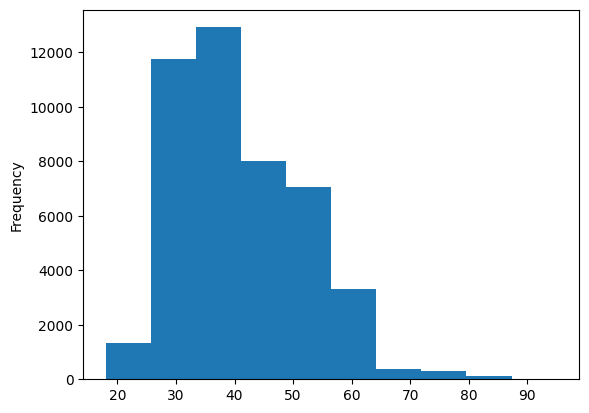

In [ ]:
df['age'].plot.hist()
plt.show()

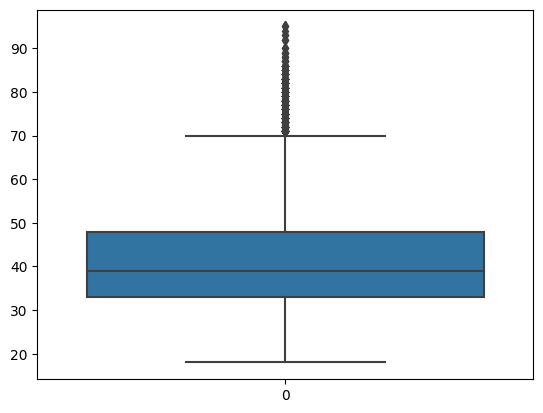

In [ ]:
sns.boxplot(df['age'])
plt.show()

In [ ]:
#balace variable
df['balance'].describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

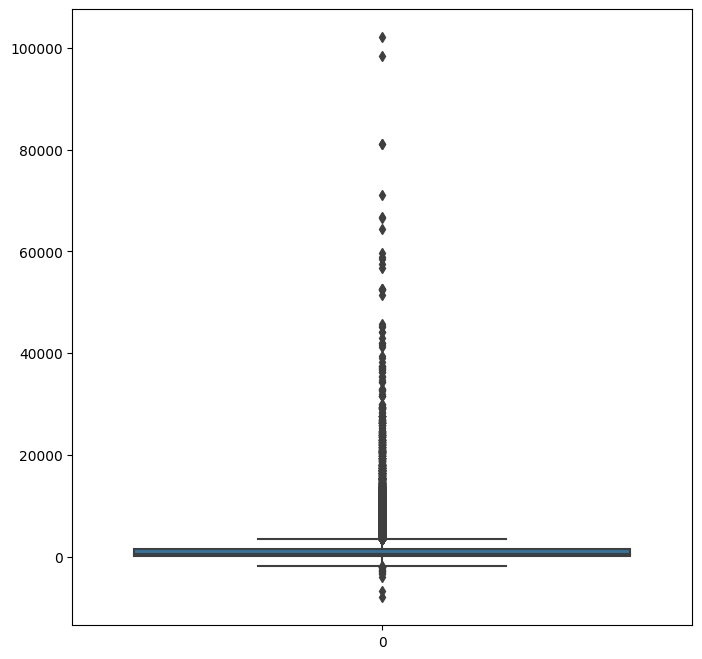

In [ ]:
plt.figure(figsize = [8,8])
sns.boxplot(df['balance'])
plt.show()

In [ ]:
#standardize variable
df['duration'].head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [ ]:
df['duration'].describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [ ]:
#some value are in second and some are in minute we have to fix it
df['duration'] = df['duration'].apply(lambda x : float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]))

In [ ]:
df['duration'].describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45191 non-null  int64  
 2   balance    45191 non-null  int64  
 3   marital    45191 non-null  object 
 4   targeted   45191 non-null  object 
 5   default    45191 non-null  object 
 6   housing    45191 non-null  object 
 7   loan       45191 non-null  object 
 8   contact    45191 non-null  object 
 9   day        45191 non-null  int64  
 10  month      45141 non-null  object 
 11  duration   45191 non-null  float64
 12  campaign   45191 non-null  int64  
 13  pdays      8252 non-null   float64
 14  previous   45191 non-null  int64  
 15  poutcome   45191 non-null  object 
 16  response   45161 non-null  object 
 17  job        45191 non-null  object 
 18  education  45191 non-null  object 
dtypes: float64(3), int64(5), object(11)
memory usa

###univarite analysis of catagorical data

Categorical data type: banking dataset: education, job, marital, poutcome and month etc.

In [ ]:
df['marital'].value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [ ]:
df['marital'].value_counts(normalize = True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

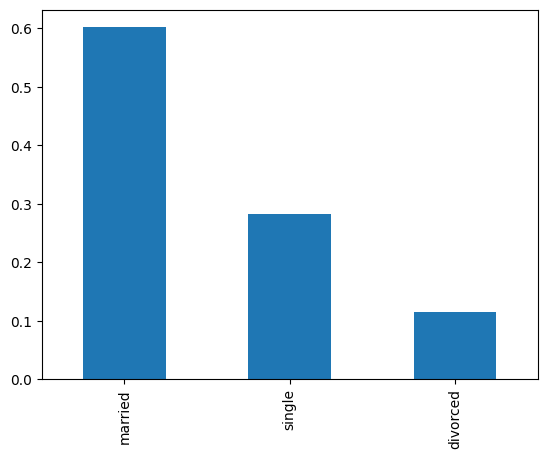

In [ ]:
df['marital'].value_counts(normalize = True).plot.bar()
plt.show()

As we can see more member comes from married cat.

In [ ]:
df['education'].value_counts()

secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: education, dtype: int64

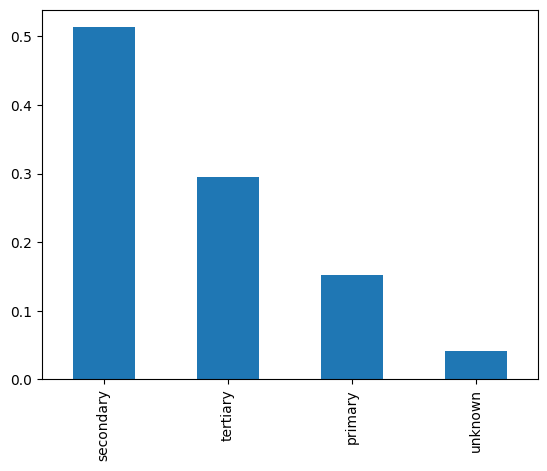

In [ ]:
df['education'].value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
df['job'].value_counts()

blue-collar      9727
management       9455
technician       7594
admin.           5170
services         4152
retired          2263
self-employed    1578
entrepreneur     1485
unemployed       1302
housemaid        1239
student           938
unknown           288
Name: job, dtype: int64

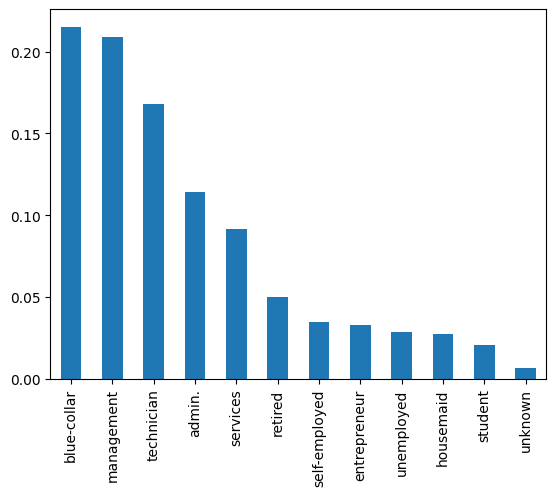

In [ ]:
df['job'].value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


In [ ]:
df['poutcome'].value_counts()

unknown    36944
failure     4898
other       1840
success     1509
Name: poutcome, dtype: int64

<Axes: >

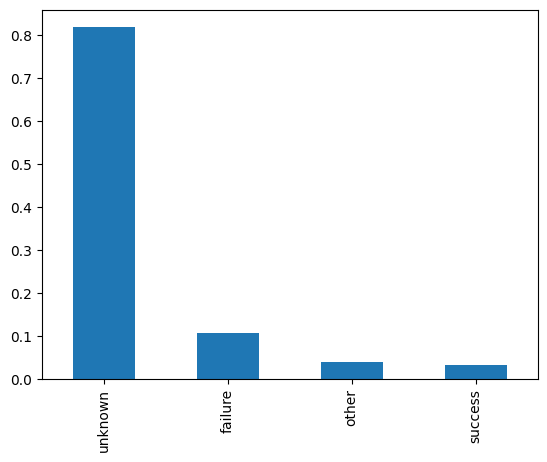

In [ ]:
df['poutcome'].value_counts(normalize = True).plot.bar()

In [ ]:
#target varible
df['response'].value_counts(normalize =True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

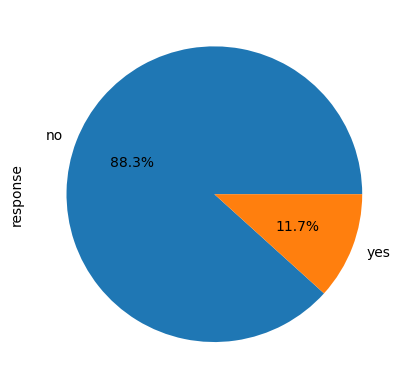

In [ ]:
df['response'].value_counts(normalize =True).plot.pie(autopct='%1.1f%%')
plt.show()

Bivariate Analysis

numerical to numerical

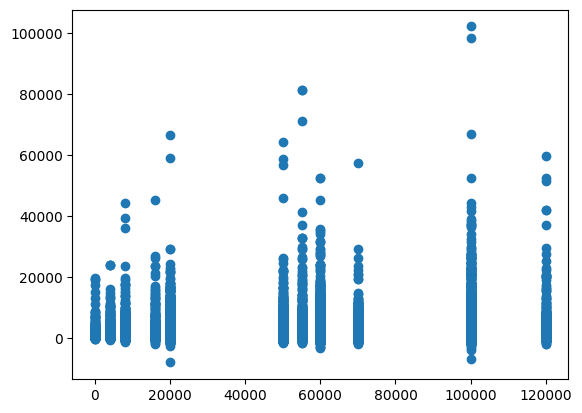

In [ ]:
plt.scatter(df['salary'], df['balance'])
plt.show()

<Axes: xlabel='age', ylabel='balance'>

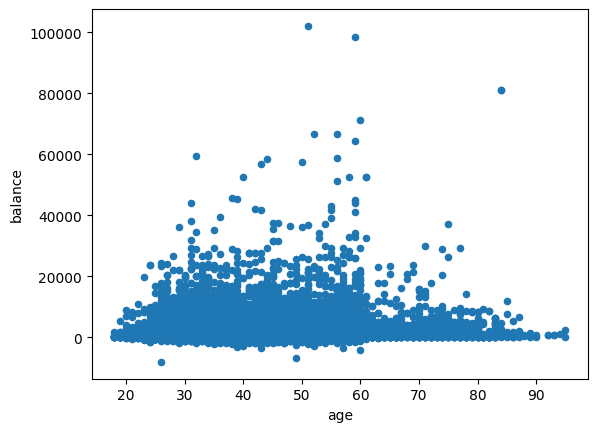

In [ ]:
df.plot.scatter(x = 'age', y = 'balance')

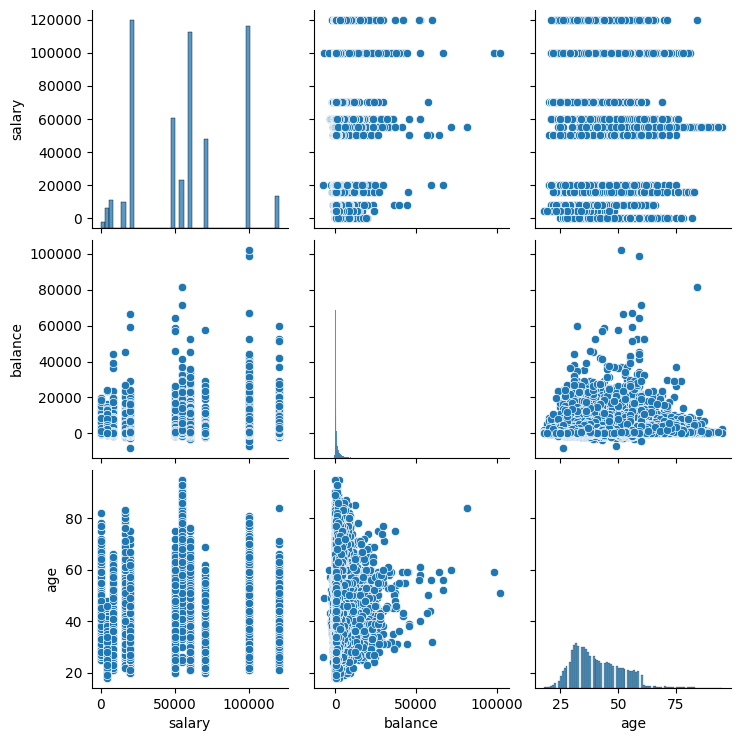

In [ ]:
sns.pairplot(data = df , vars = ['salary','balance','age'])
plt.show()

quantify using coreelation

In [ ]:
df[['age','balance','salary']].corr()

,age,balance,salary
age,1.000000,0.097755,0.024374
balance,0.097755,1.000000,0.055505
salary,0.024374,0.055505,1.000000


<Axes: >

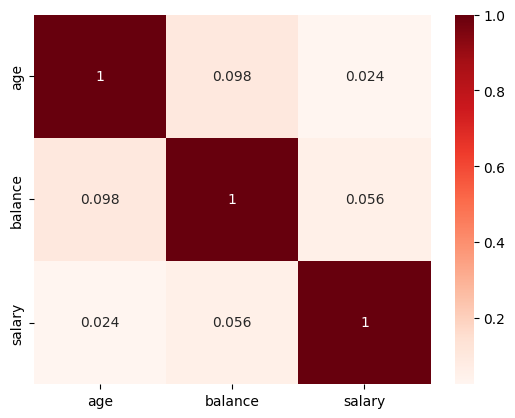

In [ ]:
#corelation heatmap
sns.heatmap(df[['age','balance','salary']].corr(), annot = True, cmap = 'Reds')

In [ ]:
df.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
df.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<Axes: xlabel='response', ylabel='salary'>

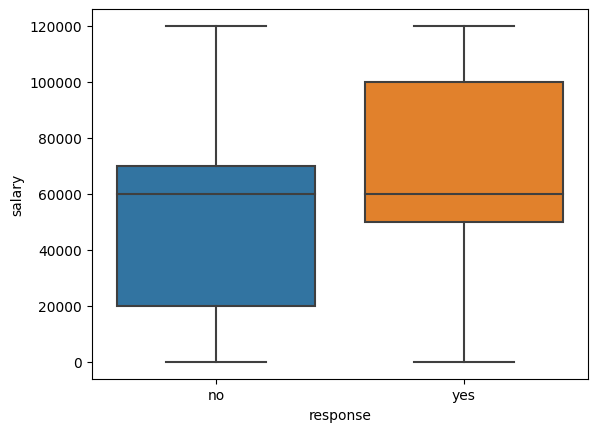

In [ ]:
sns.boxplot(data = df, x = 'response', y = 'salary')

<Axes: xlabel='response', ylabel='balance'>

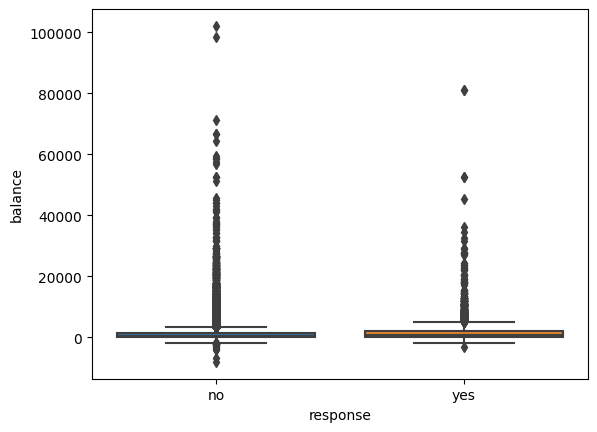

In [ ]:
sns.boxplot(data = df, x = 'response', y = 'balance')

In [ ]:
df.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [ ]:
df.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

In [ ]:
def p75 (x):
  return np.quantile(x, 0.75)

In [ ]:
df.groupby('response')['balance'].aggregate(['mean','median', p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


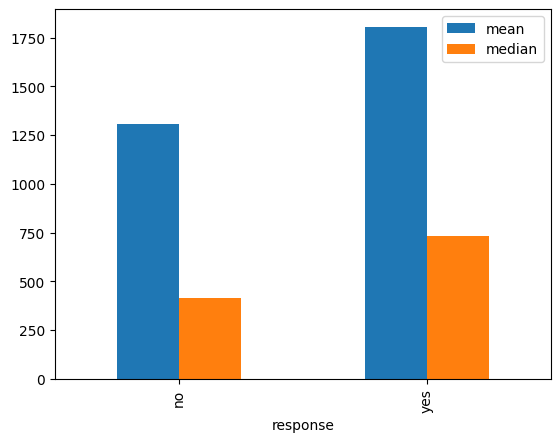

In [ ]:
df.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()
plt.show()

##cat to cat

In [ ]:
df['response_flag'] = np.where(df['response'] == 'yes',1,0)

In [ ]:
df['response_flag'].value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [ ]:
df['response'].value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [ ]:
df['response_flag'].value_counts(normalize = True)

0    0.883052
1    0.116948
Name: response_flag, dtype: float64

In [ ]:
df['response_flag'].mean()

0.11694806488017526

##education and response rate

In [ ]:
df.groupby(['education'])['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

we can education var is ha effective of yrs resonses more



##marital and response rate

In [ ]:
df.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

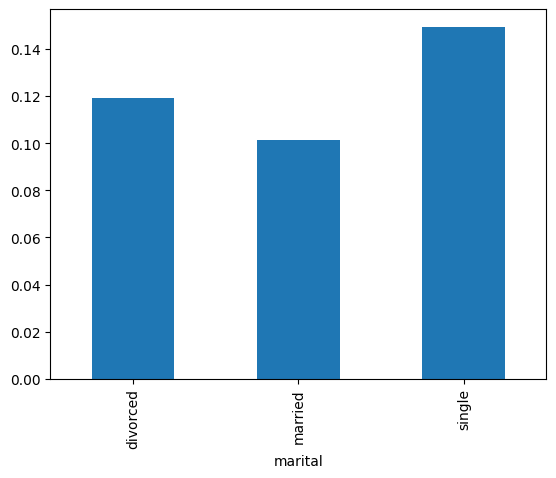

In [ ]:
 df.groupby(['marital'])['response_flag'].mean().plot.bar()
 plt.show()

as we can se we have to more focus on sigle guy according to our data



##loand and response rate

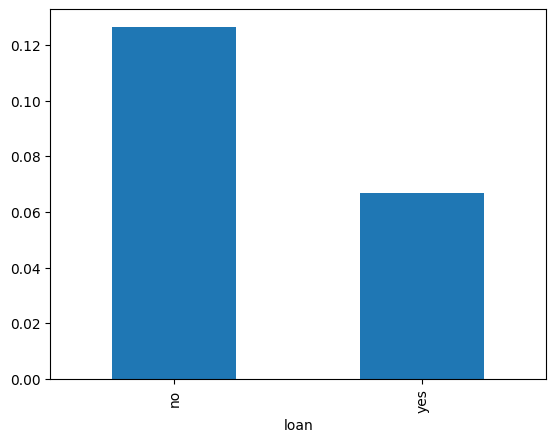

In [ ]:
 df.groupby(['loan'])['response_flag'].mean().plot.bar()
 plt.show()

people have already loan they are not convering to the yes response yes this naturally nd its obvious


##housing and response rate

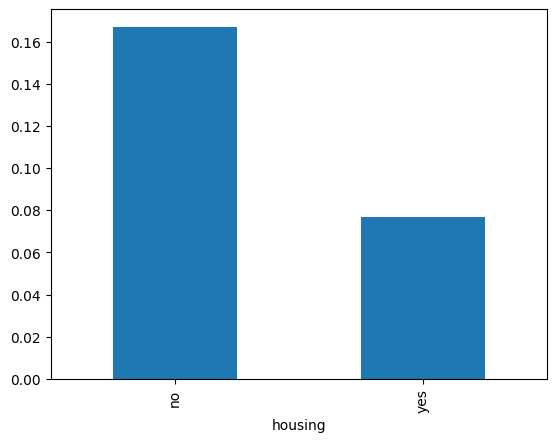

In [ ]:
 df.groupby(['housing'])['response_flag'].mean().plot.bar()
 plt.show()

people who already take take home loan they are not responding to camp


##age vs response

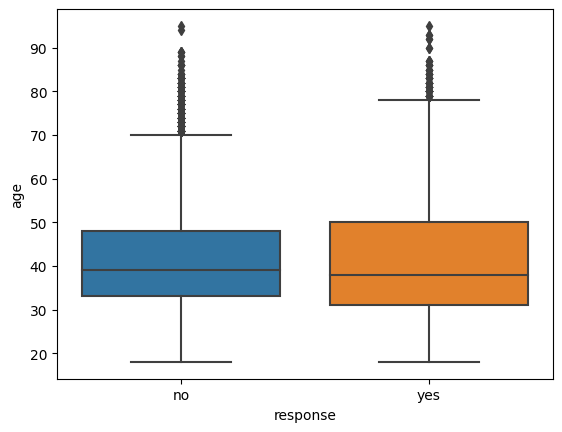

In [ ]:
sns.boxplot(data =  df , x = 'response', y = 'age')
plt.show()

#making bucket from the age colum

In [ ]:
pd.cut(df['age'][: 5],[0,30,40,50,60,999], labels = ['<30','30 - 40','40 - 50', '50-60', '60+'])

0      50-60
1    40 - 50
2    30 - 40
3    40 - 50
4    30 - 40
Name: age, dtype: category
Categories (5, object): ['<30' < '30 - 40' < '40 - 50' < '50-60' < '60+']

In [ ]:
df['age_group'] = pd.cut(df['age'],[0,30,40,50,60,999], labels = ['<30','30 - 40','40 - 50', '50-60', '60+'])

In [ ]:
df['age_group'].value_counts()

30 - 40    17679
40 - 50    11235
50-60       8061
<30         7028
60+         1188
Name: age_group, dtype: int64

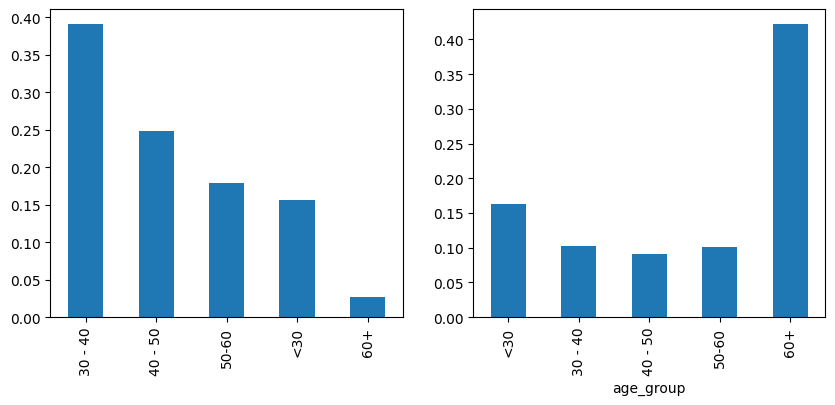

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
df['age_group'].value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
df.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

as we see greater than 40 has more positve response.

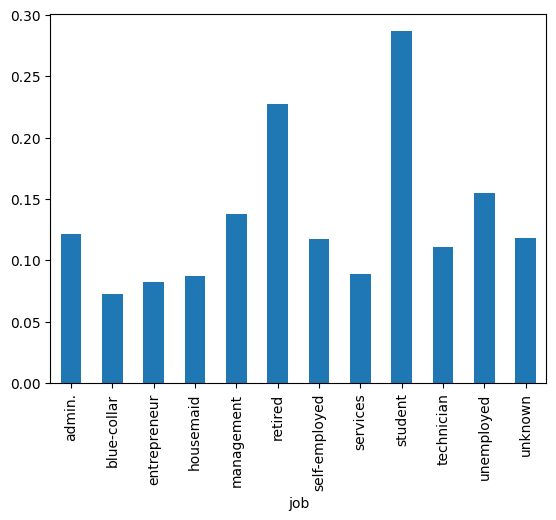

In [ ]:
df.groupby(['job'])['response_flag'].mean().plot.bar()
plt.show()

##multivariate analysis

In [ ]:
res = pd.pivot_table(data = df, index = 'education', columns ="marital", values= 'response_flag')
res

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


<Axes: xlabel='marital', ylabel='education'>

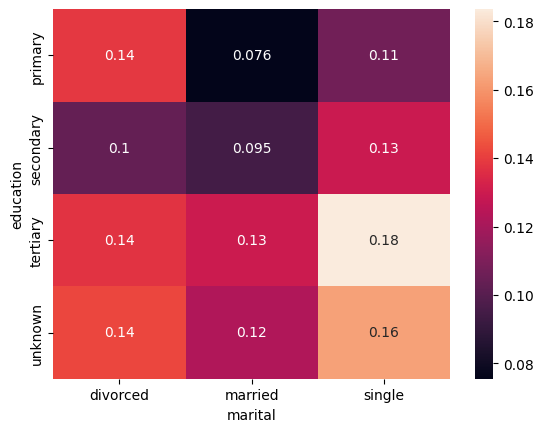

In [ ]:
sns.heatmap(res, annot = True)

#jobs vs marital vs response

<Axes: xlabel='marital', ylabel='job'>

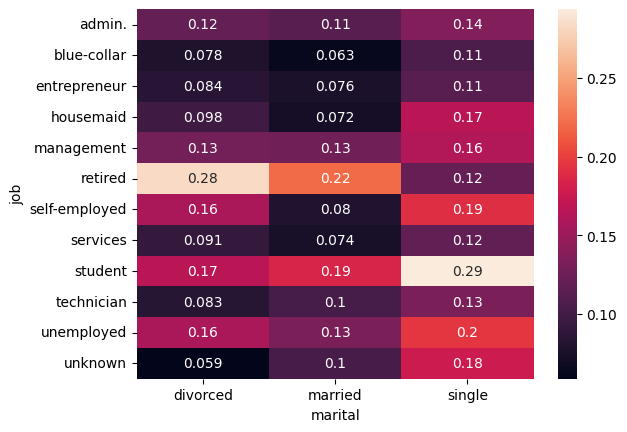

In [ ]:
res = pd.pivot_table(data = df, index = 'job', columns ="marital", values= 'response_flag')
sns.heatmap(res, annot = True)

#education vs potcome  vs response

<Axes: xlabel='poutcome', ylabel='education'>

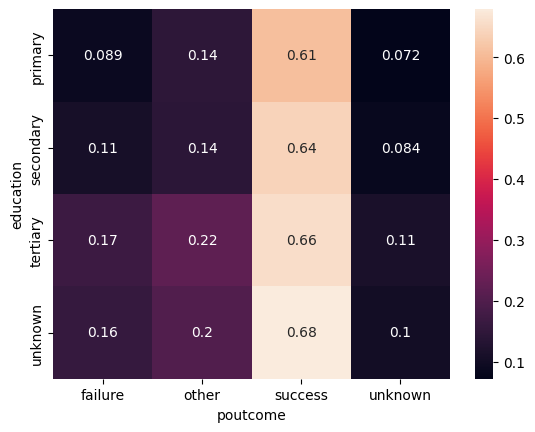

In [ ]:
res = pd.pivot_table(data = df, index = 'education', columns ="poutcome", values= 'response_flag')
sns.heatmap(res, annot = True)